In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import pandas as pd
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.preprocessing import MinMaxScaler

# Parameters

In [3]:
extra_track = 'YES' # if no extra tracks: extra_track = 'none'. If yes, provide YES, or the name of the extra track (in agreement with the config file edited)
title  = "Chromatin marks at open chromatin sites (+/- 2kb)" # plot title
upper_threshold = 2000 # max treshold of the metaplot. For automatic limit detection use: upper_threshold = 'auto'

# Loading matrix

In [4]:
# select matrix to use for the metaplot. I must be in <analysis-name>/<folder>/09_mataplot/matrix.csv
mtx = "huvec/merge/09_metaplot/matrix.csv"
df = pd.read_csv(mtx, sep='\t')

# Filtering matrix

In [5]:
### Apply filtering here

df_filt = df

### Example of filter
# df_filt = df[df['RE']=='Promoter']
df_filt = df[df['RE']!='Not assigned']

In [6]:
display(pd.DataFrame(df_filt['RE'].value_counts()))
display(df_filt.head())

,count
RE,
CTCF,17946
Promoter,9642
Enhancer,9321
Promoter/CTCF,4036
Enhancer/CTCF,2036


,H3K4me1.1,H3K4me1.2,H3K4me1.3,H3K4me1.4,H3K4me1.5,H3K4me1.6,H3K4me1.7,H3K4me1.8,H3K4me1.9,H3K4me1.10,...,POLR2A.394,POLR2A.395,POLR2A.396,POLR2A.397,POLR2A.398,POLR2A.399,POLR2A.400,RE,Activity_H3K27ac,Activity_intersect
0,0.00,35.95,101.30,130.70,143.80,222.20,212.400,196.10,170.00,114.40,...,68.95,74.540,44.72,50.31,39.13,37.27,63.36,Enhancer,Active,Active
1,0.00,0.00,16.34,32.68,32.68,32.68,3.268,32.68,114.40,163.40,...,11.18,0.000,16.77,18.64,18.64,33.54,37.27,Enhancer,Active,Active
2,98.05,98.05,98.05,19.61,0.00,0.00,0.000,13.07,32.68,32.68,...,70.81,89.450,100.60,59.63,52.18,106.20,152.80,Enhancer,Active,Active
3,65.37,88.24,137.30,163.40,183.00,120.90,55.560,19.61,29.41,32.68,...,18.64,7.454,39.13,55.90,55.90,44.72,52.18,Enhancer,Active,Active
4,326.80,238.60,294.10,235.30,228.80,258.20,196.100,150.30,52.29,98.05,...,342.90,326.100,246.00,251.60,238.50,262.80,234.80,Enhancer,Active,Active


# Single Metaplot

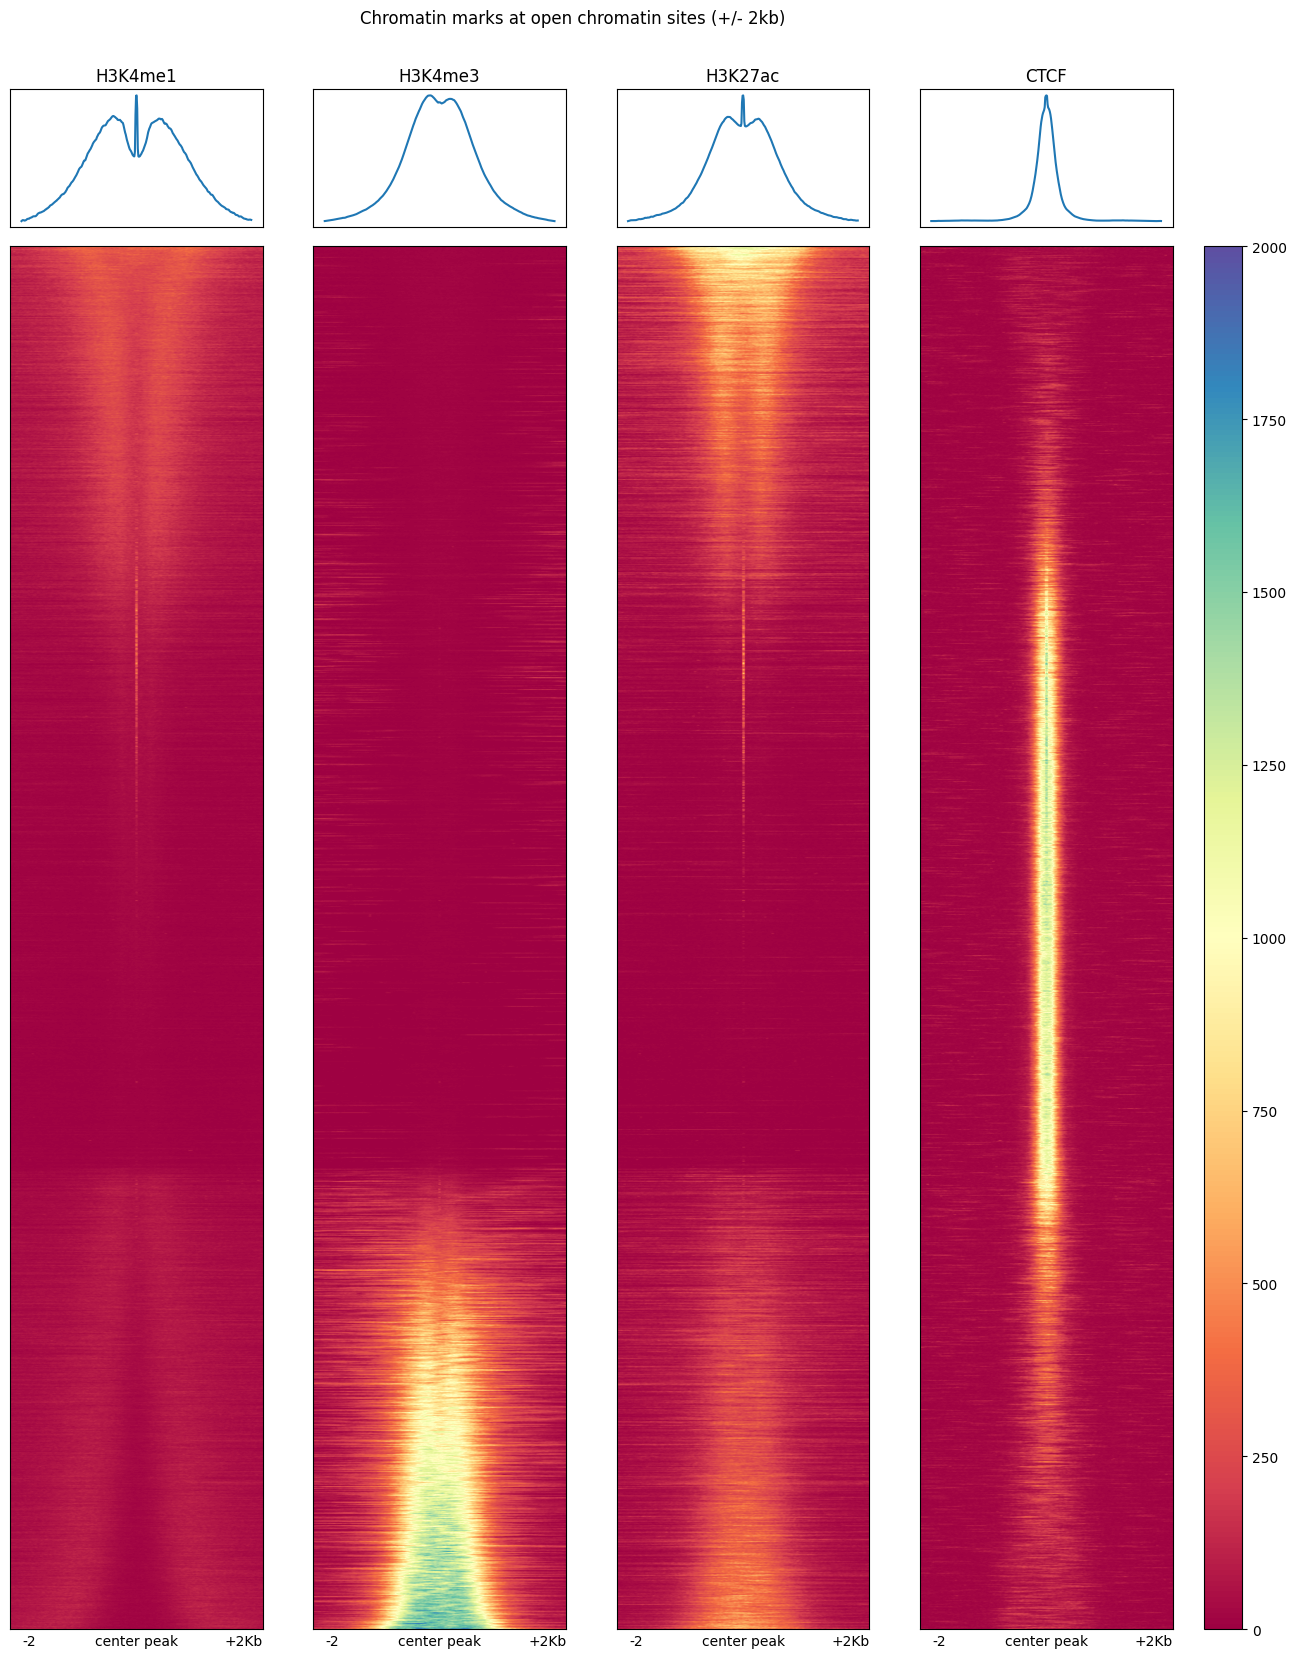

In [7]:
H3K4me1 = df[df.columns[df.columns.str.startswith("H3K4me1")]]
H3K4me3 = df[df.columns[df.columns.str.startswith("H3K4me3")]]
H3K27ac = df[df.columns[df.columns.str.startswith("H3K27ac")]]
CTCF    = df[df.columns[df.columns.str.startswith("CTCF")]]

if upper_threshold == "auto":
    zMin = np.min([np.max(H3K4me1.values), np.max(H3K4me3.values), np.max(H3K27ac.values), np.max(CTCF.values)])
else:
    zMin = upper_threshold

H3K4me1[H3K4me1 > zMin] = zMin
H3K4me3[H3K4me3 > zMin] = zMin
H3K27ac[H3K27ac > zMin] = zMin
CTCF[CTCF > zMin] = zMin

fig, axs = plt.subplots(2, 4, figsize=(15, 20), gridspec_kw={'height_ratios': [1, 10]})

axs[0,0] = sns.lineplot(np.array(H3K4me1.mean(axis=0)), ax=axs[0,0])
axs[0,1] = sns.lineplot(np.array(H3K4me3.mean(axis=0)), ax=axs[0,1])
axs[0,2] = sns.lineplot(np.array(H3K27ac.mean(axis=0)), ax=axs[0,2])
axs[0,3] = sns.lineplot(np.array(CTCF.mean(axis=0)), ax=axs[0,3])

axs[0,0].set_ylabel("")
axs[0,1].set_ylabel("")
axs[0,2].set_ylabel("")
axs[0,3].set_ylabel("")

axs[0,0].tick_params(axis='both', which='both', length=0)
axs[0,1].tick_params(axis='both', which='both', length=0)
axs[0,2].tick_params(axis='both', which='both', length=0)
axs[0,3].tick_params(axis='both', which='both', length=0)

axs[0,0].set_yticklabels([])
axs[0,1].set_yticklabels([])
axs[0,2].set_yticklabels([])
axs[0,3].set_yticklabels([])

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,2].set_xticklabels([])
axs[0,3].set_xticklabels([])

axs[0,0].set_title("H3K4me1")
axs[0,1].set_title("H3K4me3")
axs[0,2].set_title("H3K27ac")
axs[0,3].set_title("CTCF")

axs[1,0].imshow(H3K4me1, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)
axs[1,1].imshow(H3K4me3, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)
axs[1,2].imshow(H3K27ac, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)
ax = axs[1,3].imshow(CTCF, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)

axs[1,0].tick_params(axis='both', which='both', length=0)
axs[1,0].set_yticklabels([])
axs[1,1].tick_params(axis='both', which='both', length=0)
axs[1,1].set_yticklabels([])
axs[1,2].tick_params(axis='both', which='both', length=0)
axs[1,2].set_yticklabels([])
axs[1,3].tick_params(axis='both', which='both', length=0)
axs[1,3].set_yticklabels([])

axs[1,0].set_xticks([30, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])
axs[1,1].set_xticks([30, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])
axs[1,2].set_xticks([30, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])
axs[1,3].set_xticks([30, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                     (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])

axs[1,0].set_xticklabels(["-2","center peak","+2Kb"])
axs[1,1].set_xticklabels(["-2","center peak","+2Kb"])
axs[1,2].set_xticklabels(["-2","center peak","+2Kb"])
axs[1,3].set_xticklabels(["-2","center peak","+2Kb"])

fig.suptitle(title, y=0.92)

plt.subplots_adjust(hspace=0.025)

axins = inset_axes(axs[1,3],
                    width="15%",  
                    height="100%",
                    loc='center right',
                    borderpad=-5
                   )
plt.colorbar(ax, cax=axins)
plt.show()

In [8]:
### uncomment to save
# fig.savefig("custom_metaplot.pdf", bbox_inches='tight')

# Multi Metaplot

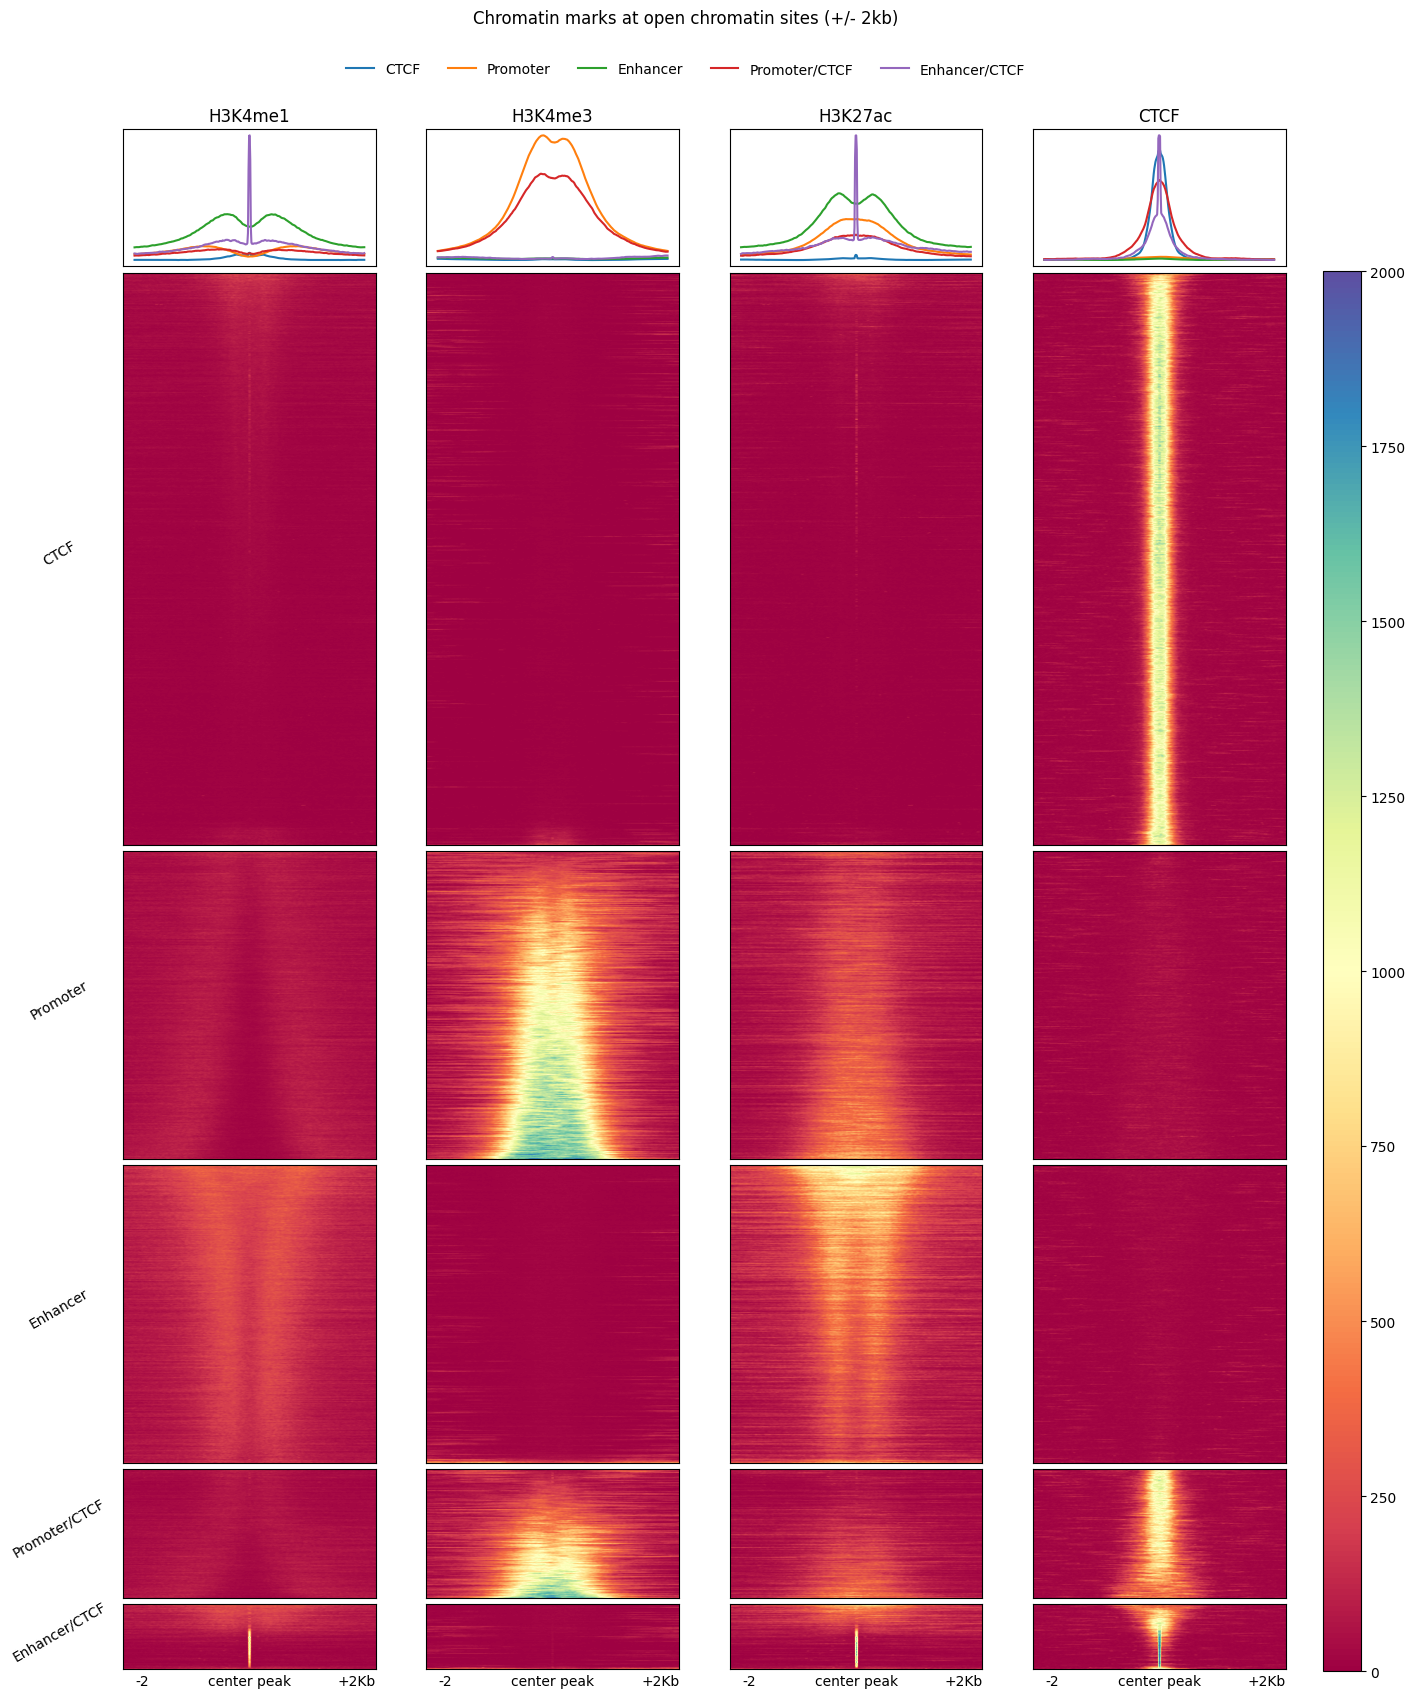

In [9]:
# metaplot2
data   = np.array(df_filt['RE'].value_counts().tolist()+[0, df_filt.shape[0]]).reshape(len(df_filt['RE'].value_counts())+2,1)
scaler = MinMaxScaler(feature_range=(0, 10))
ratio  = scaler.fit_transform(data)[:,0][:-2]

H3K4me1 = df_filt[df_filt.columns[df_filt.columns.str.startswith("H3K4me1")]]
H3K4me3 = df_filt[df_filt.columns[df_filt.columns.str.startswith("H3K4me3")]]
H3K27ac = df_filt[df_filt.columns[df_filt.columns.str.startswith("H3K27ac")]]
CTCF    = df_filt[df_filt.columns[df_filt.columns.str.startswith("CTCF")]]

if upper_threshold == "auto":
    zMin = np.min([np.max(H3K4me1.values), np.max(H3K4me3.values), np.max(H3K27ac.values), np.max(CTCF.values)])
else:
    zMin = upper_threshold

H3K4me1[H3K4me1 > zMin] = zMin
H3K4me3[H3K4me3 > zMin] = zMin
H3K27ac[H3K27ac > zMin] = zMin
CTCF[CTCF > zMin] = zMin

if extra_track == 'none':
    re = df_filt[['RE', 'Activity_H3K27ac']]
else:
    re = df_filt[['RE', 'Activity_H3K27ac', 'Activity_intersect']]

matrix_cup = df_filt[df_filt.columns[:-2]]
if extra_track == 'none':
    pass
else:
    matrix_cup = matrix_cup[matrix_cup.columns[:-1]]
matrix_cup[matrix_cup > zMin] = zMin

matrix_cup['RE'] = re['RE']
matrix_cup['Activity_H3K27ac'] = re['Activity_H3K27ac']
if extra_track == 'none':
    pass
else:
    matrix_cup['Activity_intersect'] = re['Activity_intersect']

fig, axs = plt.subplots(1+len(matrix_cup['RE'].value_counts()), 4, figsize=(15, 20), gridspec_kw={'height_ratios': [1]+list(ratio)})

for idx, clus in enumerate(matrix_cup['RE'].value_counts().index):
    subset = matrix_cup[matrix_cup['RE']==clus]
    
    H3K4me1_tmp = subset[subset.columns[subset.columns.str.startswith("H3K4me1")]]
    H3K4me3_tmp = subset[subset.columns[subset.columns.str.startswith("H3K4me3")]]
    H3K27ac_tmp = subset[subset.columns[subset.columns.str.startswith("H3K27ac")]]
    CTCF_tmp    = subset[subset.columns[subset.columns.str.startswith("CTCF")]]
    
    axs[0,0] = sns.lineplot(np.array(H3K4me1_tmp.mean(axis=0)), ax=axs[0,0], label=clus, legend=False)
    axs[0,1] = sns.lineplot(np.array(H3K4me3_tmp.mean(axis=0)), ax=axs[0,1], label=clus, legend=False)
    axs[0,2] = sns.lineplot(np.array(H3K27ac_tmp.mean(axis=0)), ax=axs[0,2], label=clus, legend=False)
    axs[0,3] = sns.lineplot(np.array(CTCF_tmp.mean(axis=0)), ax=axs[0,3], label=clus, legend=False)

handles, labels = axs[0,3].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(matrix_cup['RE'].value_counts()), frameon=False, bbox_to_anchor=(0.5,0.91))#, borderaxespad=1)

axs[0,0].set_ylabel("")
axs[0,1].set_ylabel("")
axs[0,2].set_ylabel("")
axs[0,3].set_ylabel("")

axs[0,0].tick_params(axis='both', which='both', length=0)
axs[0,0].set_yticklabels([])
axs[0,1].tick_params(axis='both', which='both', length=0)
axs[0,1].set_yticklabels([])
axs[0,2].tick_params(axis='both', which='both', length=0)
axs[0,2].set_yticklabels([])
axs[0,3].tick_params(axis='both', which='both', length=0)
axs[0,3].set_yticklabels([])

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,2].set_xticklabels([])
axs[0,3].set_xticklabels([])

axs[0,0].set_title("H3K4me1")
axs[0,1].set_title("H3K4me3")
axs[0,2].set_title("H3K27ac")
axs[0,3].set_title("CTCF")

for idx, clus in enumerate(matrix_cup['RE'].value_counts().index):
    subset = matrix_cup[matrix_cup['RE']==clus]
    
    H3K4me1_tmp = subset[subset.columns[subset.columns.str.startswith("H3K4me1")]]
    H3K4me3_tmp = subset[subset.columns[subset.columns.str.startswith("H3K4me3")]]
    H3K27ac_tmp = subset[subset.columns[subset.columns.str.startswith("H3K27ac")]]
    CTCF_tmp    = subset[subset.columns[subset.columns.str.startswith("CTCF")]]

    axs[idx+1,0].imshow(H3K4me1_tmp, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)
    axs[idx+1,1].imshow(H3K4me3_tmp, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)
    axs[idx+1,2].imshow(H3K27ac_tmp, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)
    ax = axs[idx+1,3].imshow(CTCF_tmp, interpolation='bilinear', cmap='Spectral', aspect='auto', origin='upper', vmin=0, vmax=zMin)

    
    axs[idx+1,0].tick_params(axis='both', which='both', length=0)
    axs[idx+1,1].tick_params(axis='both', which='both', length=0)
    axs[idx+1,2].tick_params(axis='both', which='both', length=0)
    axs[idx+1,3].tick_params(axis='both', which='both', length=0)

    axs[idx+1,0].set_yticklabels([])
    axs[idx+1,1].set_yticklabels([])
    axs[idx+1,2].set_yticklabels([])
    axs[idx+1,3].set_yticklabels([])

    axs[idx+1,0].set_xticklabels([])
    axs[idx+1,1].set_xticklabels([])
    axs[idx+1,2].set_xticklabels([])
    axs[idx+1,3].set_xticklabels([])
    
    axs[idx+1,0].set_ylabel(clus, rotation=30, labelpad=40)
    
axs[len(matrix_cup['RE'].value_counts()),0].set_xticks([30, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])
axs[len(matrix_cup['RE'].value_counts()),1].set_xticks([30, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])
axs[len(matrix_cup['RE'].value_counts()),2].set_xticks([30, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])
axs[len(matrix_cup['RE'].value_counts()),3].set_xticks([30, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4/2, 
                                                           (H3K4me1.shape[1] + H3K4me3.shape[1] + H3K27ac.shape[1] + CTCF.shape[1])/4-30])

axs[len(matrix_cup['RE'].value_counts()),0].set_xticklabels(["-2","center peak","+2Kb"])
axs[len(matrix_cup['RE'].value_counts()),1].set_xticklabels(["-2","center peak","+2Kb"])
axs[len(matrix_cup['RE'].value_counts()),2].set_xticklabels(["-2","center peak","+2Kb"])
axs[len(matrix_cup['RE'].value_counts()),3].set_xticklabels(["-2","center peak","+2Kb"])

fig.suptitle(title, y=0.94)

plt.subplots_adjust(hspace=0.025)

cbar_ax = fig.add_axes([0.925, 0.109, 0.025, 0.7])
fig.colorbar(ax, cax=cbar_ax)
plt.show()

In [10]:
### uncomment to save
# fig.savefig("custom_metaplot_re.pdf", bbox_inches='tight')